In [37]:
import fiftyone as fo

# Delete the existing dataset
if fo.dataset_exists("circle-pond-2"):
    fo.delete_dataset("circle-pond-2")

# Now create your new dataset
dataset = fo.Dataset("circle-pond-2")

In [40]:
import fiftyone as fo
import os
import glob

# Set the dataset name
name = "circle-pond-2"

# Set the dataset directory
dataset_dir = r"C:\Users\gbo10\OneDrive\measurement_paper_images\detection drone\runs-detections-drone-14.08\circle-pond-2"

# The splits to load
splits = ["test", "val"]

# Create or load the dataset
if fo.dataset_exists(name):
    dataset = fo.load_dataset(name)
    print(f"Loaded existing dataset '{name}'")
else:
    dataset = fo.Dataset(name)
    print(f"Created new dataset '{name}'")

def read_yolo_label(label_path):
    with open(label_path, 'r') as file:
        lines = file.readlines()
    detections = []
    for line in lines:
        class_id, x_center, y_center, width, height = map(float, line.strip().split())
        detections.append(
            fo.Detection(
                label=str(int(class_id)),  # Convert class_id to string
                bounding_box=[x_center - width/2, y_center - height/2, width, height]
            )
        )
    return detections

for split in splits:
    split_dir = os.path.join(dataset_dir, split)
    images_dir = os.path.join(split_dir, "images")
    labels_dir = os.path.join(split_dir, "labels")
    
    # Add images and labels
    for image_path in glob.glob(os.path.join(images_dir, "*")):
        image_name = os.path.basename(image_path)
        label_name = os.path.splitext(image_name)[0] + ".txt"
        label_path = os.path.join(labels_dir, label_name)
        
        sample = fo.Sample(filepath=image_path)
        sample.tags.append(split)
        
        if os.path.exists(label_path):
            detections = read_yolo_label(label_path)
            sample["ground_truth"] = fo.Detections(detections=detections)
        
        dataset.add_sample(sample)
        print(f"Added {image_name} with label (if exists)")

print(f"\nDataset '{name}' now has {len(dataset)} samples")

# Print detailed information about the dataset
print("\nDataset Summary:")
print(dataset.summary())

# Print schema of the dataset
print("\nDataset Schema:")
for field_name, field_type in dataset.get_field_schema().items():
    print(f"{field_name}: {field_type}")

# If you want to examine a specific sample
if len(dataset) > 0:
    sample = dataset.first()
    print("\nFirst Sample Details:")
    print(sample)

    if "ground_truth" in sample:
        print("\nGround Truth for First Sample:")
        print(sample.ground_truth)
    else:
        print("\nWarning: 'ground_truth' field not found in the first sample")
else:
    print("\nWarning: Dataset is empty")

# Optionally, you can visualize the dataset
# session = fo.launch_app(dataset)
# session.wait()


Loaded existing dataset 'circle-pond-2'
Added 20230920_121217_jpg.rf.555850596373d9093b5263e90fd0b0a7.jpg with label (if exists)
Added 20230920_121220_jpg.rf.ac37e69c72ff509e032d4e378189c9d1.jpg with label (if exists)
Added 20230920_121227_jpg.rf.d195c6e54f8d06a6f51505b978333c1c.jpg with label (if exists)
Added 20230920_121238_jpg.rf.c0192c9518e2c9e4efd18cade234e6e7.jpg with label (if exists)
Added 20230920_121250_jpg.rf.6bd25d544ea9f9867558c05f3ba88eb1.jpg with label (if exists)
Added 20230920_121254_jpg.rf.c16222fb0f320908468985d74cec3ec8.jpg with label (if exists)
Added 20230920_121259_jpg.rf.52f13a58daa39b915c4011a697910bfc.jpg with label (if exists)
Added 20230920_121318_jpg.rf.f94ae454fda993a57443d666c7e4e4d0.jpg with label (if exists)
Added 20230920_121322_jpg.rf.2781af8d8a0b210c47cbfd0e41ce84df.jpg with label (if exists)
Added 20230920_121325_jpg.rf.273c044db976c007f0ba375f14025c67.jpg with label (if exists)
Added 20230920_121331_jpg.rf.6aae391459311c230ad9a2979f627cc4.jpg with

In [ ]:
session = fo.launch_app(dataset)

In [43]:
from ultralytics import RTDETR


model= RTDETR(r"C:\Users\gbo10\OneDrive\measurement_paper_images\detection drone\runs-detections-drone-14.08\detect\train\weights\best.pt")



dataset.view().apply_model(model, label_field="RTDETR")



 100% |███████████████████| 75/75 [1.0m elapsed, 0s remaining, 1.2 samples/s]      


In [50]:
import fiftyone as fo
import os

# Load your FiftyOne dataset


# Define the mapping between local folders and their corresponding tags
path_to_tag_map = {
    r"C:\Users\gbo10\Dropbox\research videos\before january 2024\underwater drone/20.9\natural": "natural",
    r"C:\Users\gbo10\Dropbox\research videos\before january 2024\underwater drone/20.9\light plus flash": "light+", 
         r"C:\Users\gbo10\Dropbox\research videos\before january 2024\underwater dron/20.9\with dark": "dark",  # Add more mappings as needed
 # Add more mappings as needed
}

# Create a dictionary to map base filenames to tags
filename_to_tag = {}

for folder_path, tag in path_to_tag_map.items():
    for root, _, files in os.walk(folder_path):
        for filename in files:
            # Extract the base filename (without extension)
            base_filename = os.path.splitext(filename)[0]
            filename_to_tag[base_filename] = tag

# Iterate through each sample in the FiftyOne dataset
for sample in dataset:
    # Extract the base filename from the sample's filepath
    sample_filename = os.path.basename(sample.filepath)

    # Find the common part of the filename (e.g., "20230920_121147")
    common_part = "_".join(sample_filename.split("_")[:2])  # Adjust the splitting logic if needed

    # Check if the common part exists in our filename_to_tag map
    if common_part in filename_to_tag:
        # Get the corresponding tag
        tag = filename_to_tag[common_part]

        # Append the tag to the sample and save it
        sample.tags.append(tag)
        sample.save()
        print(f"Tagged {sample.filepath} with '{tag}'")

print("Tagging complete!")


Tagged C:\Users\gbo10\OneDrive\measurement_paper_images\detection drone\runs-detections-drone-14.08\circle-pond-2\test\images\20230920_121217_jpg.rf.555850596373d9093b5263e90fd0b0a7.jpg with 'natural'
Tagged C:\Users\gbo10\OneDrive\measurement_paper_images\detection drone\runs-detections-drone-14.08\circle-pond-2\test\images\20230920_121220_jpg.rf.ac37e69c72ff509e032d4e378189c9d1.jpg with 'natural'
Tagged C:\Users\gbo10\OneDrive\measurement_paper_images\detection drone\runs-detections-drone-14.08\circle-pond-2\test\images\20230920_121227_jpg.rf.d195c6e54f8d06a6f51505b978333c1c.jpg with 'natural'
Tagged C:\Users\gbo10\OneDrive\measurement_paper_images\detection drone\runs-detections-drone-14.08\circle-pond-2\test\images\20230920_121238_jpg.rf.c0192c9518e2c9e4efd18cade234e6e7.jpg with 'natural'
Tagged C:\Users\gbo10\OneDrive\measurement_paper_images\detection drone\runs-detections-drone-14.08\circle-pond-2\test\images\20230920_121250_jpg.rf.6bd25d544ea9f9867558c05f3ba88eb1.jpg with 'natu


Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 seconds


Could not connect session, trying again in 10 s

In [ ]:
sample = dataset.first()
print(sample.ground_truth.detections[0])

# counting analysis final

In [87]:
from fiftyone.utils.yolo import YOLOv5DatasetImporter

importer = YOLOv5DatasetImporter(
    dataset_dir=r"C:\Users\gbo10\OneDrive\measurement_paper_images\current from roboflow -28.8-first sense\counting",
    split="test"
)

dataset = fo.Dataset.from_importer(importer, name="counting-2",overwrite=True)

 100% |███████████████████| 79/79 [406.0ms elapsed, 0s remaining, 196.4 samples/s]      


In [88]:
session = fo.launch_app(dataset)

In [89]:
import fiftyone as fo
import os
from fiftyone import ViewField as F
# Load your dataset
dataset = fo.load_dataset("counting-2")

# Define the paths to the folders
light_plus_flash_folder = r"C:\Users\gbo10\Dropbox\research videos\before january 2024\underwater drone/20.9 - Copy\light plus flash"
natural_folder = r"C:\Users\gbo10\Dropbox\research videos\before january 2024\underwater drone/20.9 - Copy\natural"
dark_and_flash_folder = r"C:\Users\gbo10\Dropbox\research videos\before january 2024\underwater drone/20.9 - Copy\with dark and flash"

# Function to extract the prefix from the filenames
def get_prefix(filename):
    return filename.split('_jpg')[0] if '_jpg' in filename else filename.split('.')[0]

# Function to tag based on folder

def tag_images_from_folder(folder_path, tag_name):
    filenames = [get_prefix(f) for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    for filename_prefix in filenames:
        for sample in dataset:  
            if filename_prefix in sample.filepath:
                        
                        sample.tags.append(tag_name)
                        sample.save()

# Tag images
tag_images_from_folder(light_plus_flash_folder, "light_plus_flash")
tag_images_from_folder(natural_folder, "natural")
tag_images_from_folder(dark_and_flash_folder, "dark_and_flash")

# Verify tagging
for tag in ["light_plus_flash", "natural", "dark_and_flash"]:
    view = dataset.match_tags(tag)
    print(f"Images tagged with {tag}: {len(view)}")


Images tagged with light_plus_flash: 13
Images tagged with natural: 38
Images tagged with dark_and_flash: 28


In [106]:
from ultralytics import RTDETR

model = RTDETR(r'C:\Users\gbo10\OneDrive\measurement_paper_images\weights- 28.08\drone_first_sens.pt')

dataset.apply_model(model, label_field="predictions")   

 100% |███████████████████| 79/79 [1.1m elapsed, 0s remaining, 1.2 samples/s]      


In [107]:
results=dataset.evaluate_detections("predictions", gt_field="ground_truth", eval_key="eval",iou=0.25,compute_mAP=True)

Evaluating detections...
 100% |███████████████████| 79/79 [2.0s elapsed, 0s remaining, 26.3 samples/s]         
Performing IoU sweep...
 100% |███████████████████| 79/79 [1.8s elapsed, 0s remaining, 34.8 samples/s]         


In [108]:
from fiftyone import ViewField as F





# Expression that computes the number of predicted objects
num_objects = F("predictions.detections").length()

# The `(min, max)` number of predictions per sample
print(dataset.bounds(num_objects))

# The average number of predictions per sample
print(dataset.mean(num_objects))


(1, 18)
8.050632911392405


In [109]:
num_objects

{'$size': {'$ifNull': ['$predictions.detections', []]}}

In [110]:
num_objects = F("ground_truth.detections").length()

# The `(min, max)` number of ground truth objects per sample
print(dataset.bounds(num_objects))

# The average number of ground truth objects per sample

print(dataset.mean(num_objects))

(0, 19)
6.987341772151899


In [111]:
results.print_report()

              precision    recall  f1-score   support

       prawn       0.80      0.92      0.86       552

   micro avg       0.80      0.92      0.86       552
   macro avg       0.80      0.92      0.86       552
weighted avg       0.80      0.92      0.86       552



In [97]:
from fiftyone import evaluation_config

evaluation_config.detection_backends.keys()

dict_keys(['activitynet', 'coco', 'open-images'])

In [ ]:
import matplotlib.pyplot as plt

def plot_histogram(dataset, field, bins=10):
    # Compute the histogram
    counts, bin_edges = dataset.histogram(field, bins=bins)

    # Plot the histogram
    plt.bar(bin_edges[:-1], counts, width=bin_edges[1] - bin_edges[0])

    # Add labels
    plt.xlabel(field)
    plt.ylabel("Count")
    plt.title(f"{field} Histogram")

    plt.show()

plot_histogram(dataset, "ground_truth.detections.length", bins=10)

In [78]:
import fiftyone as fo
from fiftyone import ViewField as F

# Query for samples with at least 5 false positives
query = F("eval_fp").length() == 5

try:
    # Get the view of samples matching the query
    view = dataset.match(query)

    # Print the filenames and false positive counts
    for sample in view:
        fp_count = sample.eval_fp
        print(f"Filename: {sample.filepath}, False Positives: {fp_count}")

except Exception as e:
    print(f"An error occurred: {str(e)}")
    
    # If the above fails, try a different approach
    print("Attempting alternative method...")
    
    for sample in dataset:
        if hasattr(sample, 'eval_fp'):
            fp_count = sample.eval_fp
            if fp_count == 1:
                print(f"Filename: {sample.filepath}, False Positives: {fp_count}")

An error occurred: PlanExecutor error during aggregation :: caused by :: The argument to $size must be an array, but was of type: int, full error: {'ok': 0.0, 'errmsg': 'PlanExecutor error during aggregation :: caused by :: The argument to $size must be an array, but was of type: int', 'code': 17124, 'codeName': 'Location17124'}
Attempting alternative method...
Filename: C:\Users\gbo10\OneDrive\measurement_paper_images\current from roboflow -28.8-first sense\counting\circle pond.v4i.yolov8\test\images\20230920_115121_jpg.rf.df6003b620f742b4cbd61ce7b14a2eee.jpg, False Positives: 1
Filename: C:\Users\gbo10\OneDrive\measurement_paper_images\current from roboflow -28.8-first sense\counting\circle pond.v4i.yolov8\test\images\20230920_115221_jpg.rf.9459a138e868e1e439ebcdb97ca83f27.jpg, False Positives: 1
Filename: C:\Users\gbo10\OneDrive\measurement_paper_images\current from roboflow -28.8-first sense\counting\circle pond.v4i.yolov8\test\images\20230920_115259_jpg.rf.0357a3d952e0d47609e32889

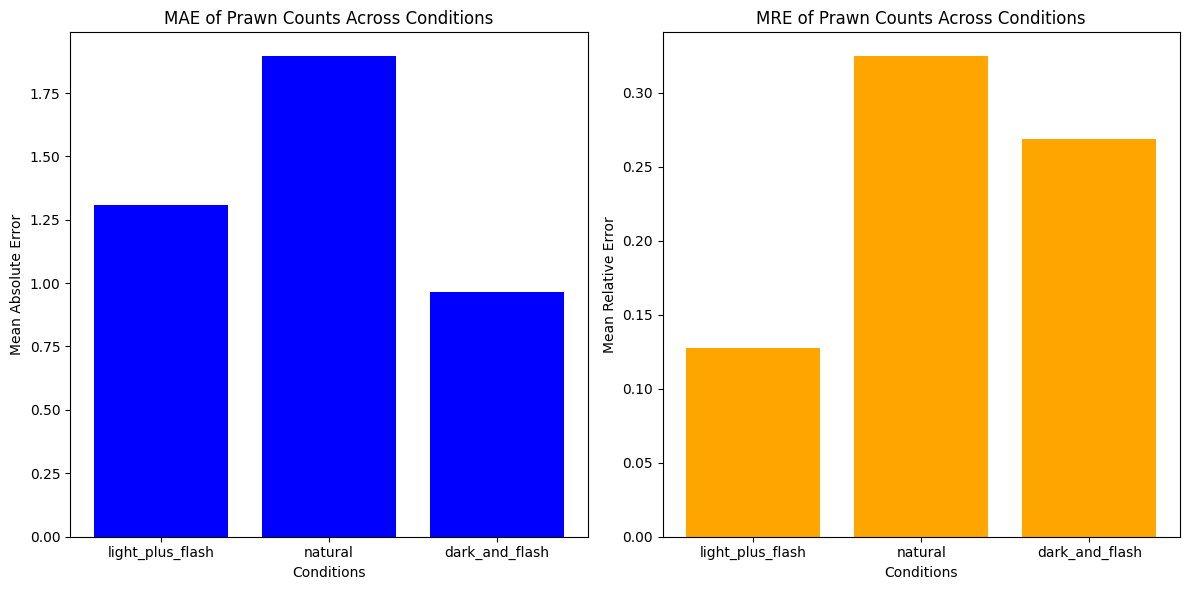

In [98]:
import matplotlib.pyplot as plt
import numpy as np

conditions = ["light_plus_flash", "natural", "dark_and_flash"]
mae_values = []
mre_values = []

for condition in conditions:
    view = dataset.match_tags(condition)
    abs_errors = []
    rel_errors = []

    for sample in view:
        # Count the number of ground truth objects and predicted objects
        gt_count = len(sample.ground_truth.detections)
        pred_count = len(sample.predictions.detections)
        
        # Calculate the absolute error
        abs_error = abs(pred_count - gt_count)
        abs_errors.append(abs_error)
        
        # Calculate the relative error (avoid division by zero)
        if gt_count > 0:
            rel_error = abs_error / gt_count
        else:
            rel_error = 0.0
        rel_errors.append(rel_error)
    
    # Calculate the mean absolute error and mean relative error for this condition
    mae = np.mean(abs_errors)
    mre = np.mean(rel_errors)
    
    mae_values.append(mae)
    mre_values.append(mre)

# Plot the MAE values for each condition
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(conditions, mae_values, color='blue')
plt.xlabel('Conditions')
plt.ylabel('Mean Absolute Error')
plt.title('MAE of Prawn Counts Across Conditions')

# Plot the MRE values for each condition
plt.subplot(1, 2, 2)
plt.bar(conditions, mre_values, color='orange')
plt.xlabel('Conditions')
plt.ylabel('Mean Relative Error')
plt.title('MRE of Prawn Counts Across Conditions')

plt.tight_layout()
plt.show()


Evaluating detections...
 100% |███████████████████| 13/13 [1.6s elapsed, 0s remaining, 8.1 samples/s]      
Performing IoU sweep...
 100% |███████████████████| 13/13 [362.0ms elapsed, 0s remaining, 35.9 samples/s]      
0.2187053515469273
Ignoring unsupported argument `thresholds` for the 'matplotlib' backend
Evaluating detections...
  26% |█████/-------------| 10/38 [111.7ms elapsed, 312.8ms remaining, 89.5 samples/s] 

C:\Users\gbo10\AppData\Local\Temp\ipykernel_30468\4132862852.py:15: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



 100% |███████████████████| 38/38 [543.0ms elapsed, 0s remaining, 70.0 samples/s]      
Performing IoU sweep...
 100% |███████████████████| 38/38 [871.9ms elapsed, 0s remaining, 43.6 samples/s]      
0.27599232512546745
Ignoring unsupported argument `thresholds` for the 'matplotlib' backend
Evaluating detections...
  46% |████████/----------| 13/28 [113.1ms elapsed, 130.5ms remaining, 114.9 samples/s] 

C:\Users\gbo10\AppData\Local\Temp\ipykernel_30468\4132862852.py:15: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



 100% |███████████████████| 28/28 [283.8ms elapsed, 0s remaining, 98.7 samples/s]       
Performing IoU sweep...
 100% |███████████████████| 28/28 [444.2ms elapsed, 0s remaining, 63.0 samples/s]      
0.2938574631887236
Ignoring unsupported argument `thresholds` for the 'matplotlib' backend


C:\Users\gbo10\AppData\Local\Temp\ipykernel_30468\4132862852.py:15: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



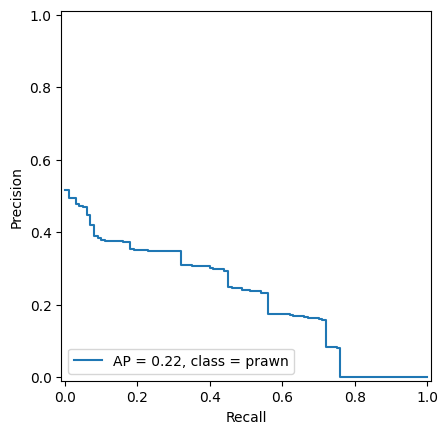

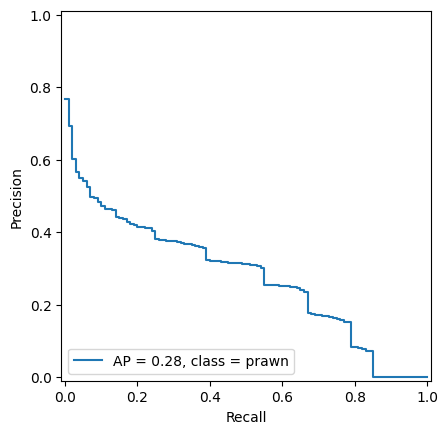

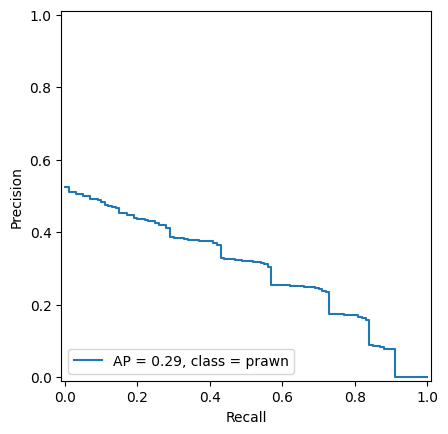

In [122]:
import numpy as np
import fiftyone.core.plots as fop

conditions = ["light_plus_flash", "natural", "dark_and_flash"]

for condition in conditions:
    view = dataset.match_tags(condition)
    results = view.evaluate_detections("predictions", gt_field="ground_truth",compute_mAP=True,confidence_thresh=0.25)     
    
    # Extract the mAP value
    print(results.mAP())
# 0.3957

    plot = results.plot_pr_curves(classes=["prawn"], backend="matplotlib")
    plot.show()


In [116]:
results.plot_pr_curves()

AttributeError: 'DetectionResults' object has no attribute 'plot_pr_curves'

In [112]:
import seaborn as sns

count_diffs = []

for condition in conditions:
    view = dataset.match_tags(condition)
    for sample in view:
        pred_count = len(sample.predictions.detections)
        gt_count = len(sample.ground_truth.detections)
        count_diffs.append({"Condition": condition, "Count Difference": pred_count - gt_count})

sns.boxplot(x="Condition", y="Count Difference", data=count_diffs)
plt.title("Distribution of Count Differences Across Conditions")
plt.show()


TypeError: Data source must be a DataFrame or Mapping, not <class 'list'>.

In [ ]:
for condition in conditions:
    view = dataset.match_tags(condition)
    gt_counts = []
    pred_counts = []

    for sample in view:
        gt_counts.append(len(sample.ground_truth.detections))
        pred_counts.append(len(sample.predictions.detections))
    
    plt.scatter(gt_counts, pred_counts, label=condition)

plt.plot([min(gt_counts), max(gt_counts)], [min(gt_counts), max(gt_counts)], 'k--', lw=2)  # Line y=x
plt.xlabel('Ground Truth Counts')
plt.ylabel('Predicted Counts')
plt.title('Predicted vs Ground Truth Counts')
plt.legend()
plt.show()


In [ ]:
for condition in conditions:
    view = dataset.match_tags(condition)
    count_diffs = []

    for sample in view:
        pred_count = len(sample.predictions.detections)
        gt_count = len(sample.ground_truth.detections)
        count_diffs.append(pred_count - gt_count)
    
    plt.hist(count_diffs, bins=20, alpha=0.5, label=condition)

plt.xlabel('Count Difference (Predicted - Ground Truth)')
plt.ylabel('Frequency')
plt.title('Histogram of Count Differences Across Conditions')
plt.legend()
plt.show()
